ZOMATO DATA ANALYSIS PROJECT

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob

**Data frame Creation**

In [38]:
dataframe=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis/Zomato_Python_Project/Zomato data.csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  \
0                            800          Buffet   
1                            800          Buffet   
2                          

**Convert the data type of column-rate**

In [39]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  \
0                          800          Buffet   
1                          800          Buffet   
2                          800          Buffet   
3                          300          Buffet   
4                          600          Buffet   

                                    review  
0  I would definitely recommend this place  
1         The food took too long to arrive  
2         The restaurant decor is stunning  
3                   The service was subpar  
4         The food took too long to arrive  


**Data Cleaning**(Check if there are any null values if yes then remove it)

In [40]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
 7   review                       148 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.4+ KB


**What type of restaurant do the majority of customers order from?**

In [41]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),review
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,I would definitely recommend this place
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,The food took too long to arrive
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,The restaurant decor is stunning
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,The service was subpar
4,Grand Village,No,No,3.8,166,600,Buffet,The food took too long to arrive


Text(0.5, 0, 'type of resturant')

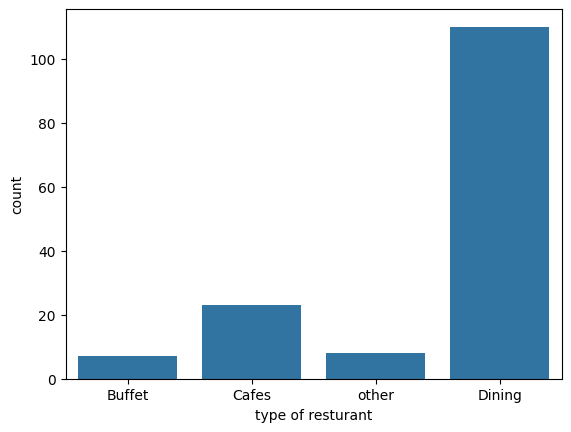

In [42]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")

Answer-From Dining type

**How many votes has each type of restaurant received from customers?**

Text(0, 0.5, 'votes')

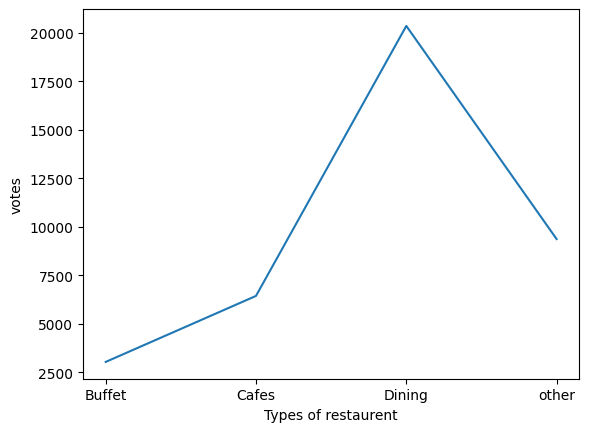

In [43]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result)
plt.xlabel("Types of restaurent")
plt.ylabel("votes")

**What are the ratings that the majority of restaurants have received?**

In [44]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),review
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,I would definitely recommend this place
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,The food took too long to arrive
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,The restaurant decor is stunning
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,The service was subpar
4,Grand Village,No,No,3.8,166,600,Buffet,The food took too long to arrive


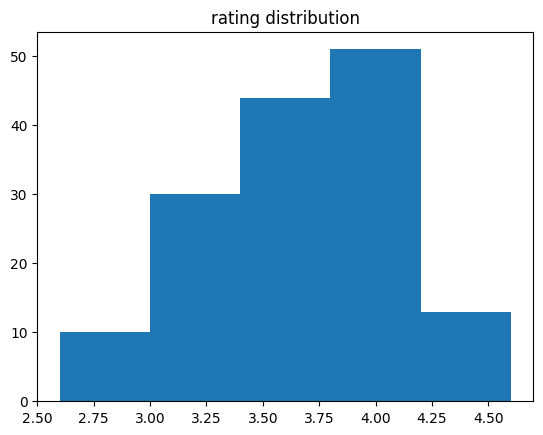

In [45]:
plt.hist(dataframe['rate'],bins=5)
plt.title("rating distribution")
plt.show()

Answer-Majority of resturant have received a rating between 3.5 to 4

**Zomato has observed that most couples order most of their food online.
What is their average spending on each order?**

Text(0.5, 0, 'approx_cost(for two people)')

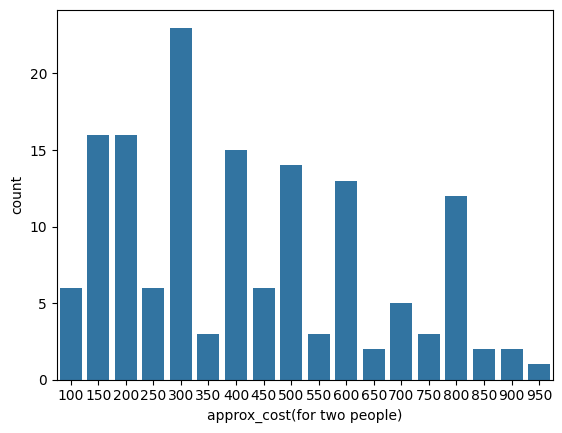

In [46]:
Order_data=dataframe['approx_cost(for two people)']
sns.countplot(x=Order_data)
plt.xlabel("approx_cost(for two people)")

Answer-The majority of people prefer resturants with approx cost of 300 rupees

**Which mode (online or offline) has received the maximum rating?**

In [47]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),review
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,I would definitely recommend this place
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,The food took too long to arrive
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,The restaurant decor is stunning
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,The service was subpar
4,Grand Village,No,No,3.8,166,600,Buffet,The food took too long to arrive


<Axes: xlabel='online_order', ylabel='rate'>

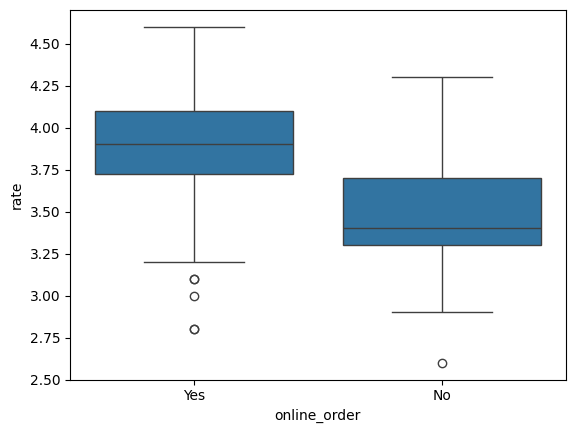

In [48]:
sns.boxplot(x='online_order',y='rate',data=dataframe)

Answer-Offline order received lower rating compared to Online

**Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?**

In [49]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),review
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,I would definitely recommend this place
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,The food took too long to arrive
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,The restaurant decor is stunning
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,The service was subpar
4,Grand Village,No,No,3.8,166,600,Buffet,The food took too long to arrive


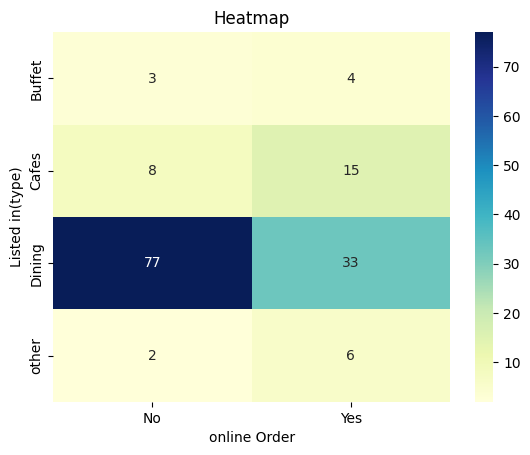

In [50]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order' ,aggfunc='size', fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("online Order")
plt.ylabel("Listed in(type)")
plt.show()

Answer-Dining received more offline orders

**SENTIMENT ANALYSIS**

In [52]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),review
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,I would definitely recommend this place
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,The food took too long to arrive
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,The restaurant decor is stunning
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,The service was subpar
4,Grand Village,No,No,3.8,166,600,Buffet,The food took too long to arrive


In [55]:
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

dataframe['sentiment'] = dataframe['review'].apply(get_sentiment)
print(dataframe['sentiment'])

0       Neutral
1      Negative
2      Positive
3       Neutral
4      Negative
         ...   
143     Neutral
144    Negative
145    Positive
146     Neutral
147    Negative
Name: sentiment, Length: 148, dtype: object


sentiment
Positive    74
Negative    42
Neutral     32
Name: count, dtype: int64


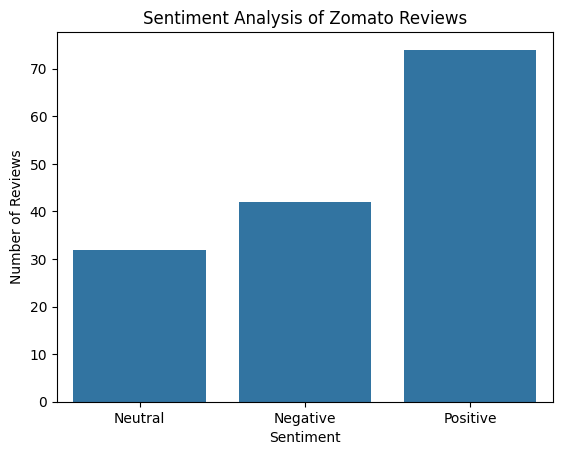

In [56]:
print(dataframe['sentiment'].value_counts())
sns.countplot(x=dataframe['sentiment'])
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Analysis of Zomato Reviews")
plt.show()

In [59]:
dataframe.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Analysis/Zomato_Python_Project/cleaned_zomato_data.csv', index=False)
